In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import utils
from keras import Input
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# MNIST dataset params
num_classes = 10 # 0-9 digits
num_features = 784 # img shape: 28*28

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert to float32
X_train = np.array(X_train, np.float32)
X_test = np.array(X_test, np.float32)

# concatenate all data
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# shuffle data
X, y = shuffle(X, y)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# vectorize images
X_train = X_train.reshape([-1, num_features])
X_test = X_test.reshape([-1, num_features])

# normalize images values from [0, 255] to [0, 1]
X_train = X_train / 255.
X_test = X_test / 255.

# Convert target classes to categorical ones (one-hot encoding)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Training Inputs:")
utils.data_summary(X_train)

print("Testing Inputs:")
utils.data_summary(X_test)

print("Training Outputs:")
utils.data_summary(y_train)

print("Testing Outputs:")
utils.data_summary(y_test)


Training Inputs:
Shape = (56000, 784)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.09523605
Standard Deviation = 0.30860338

Testing Inputs:
Shape = (14000, 784)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.09475792
Standard Deviation = 0.30782774

Training Outputs:
Shape = (56000, 10)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.09000002
Standard Deviation = 0.30000004

Testing Outputs:
Shape = (14000, 10)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.09
Standard Deviation = 0.3



In [2]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256

# create model
mlp_adam = keras.Sequential(name="MLP_Adam")
mlp_adam.add(Input(shape=(num_features,)))
mlp_adam.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu"))
mlp_adam.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu"))
mlp_adam.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax"))

mlp_adam.summary()

Model: "MLP_Adam"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [3]:
# compile model
mlp_adam.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = mlp_adam.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 0.3812 - accuracy: 0.8942 - val_loss: 0.1862 - val_accuracy: 0.9466
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1396 - accuracy: 0.9593 - val_loss: 0.1309 - val_accuracy: 0.9611
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0964 - accuracy: 0.9713 - val_loss: 0.1109 - val_accuracy: 0.9664
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0728 - accuracy: 0.9778 - val_loss: 0.1029 - val_accuracy: 0.9690
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0962 - val_accuracy: 0.9717
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0970 - val_accuracy: 0.9709
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0913 - val_accuracy: 0.9735

438/438 [==============================] - 1s 2ms/step - loss: 0.1872 - accuracy: 0.9803


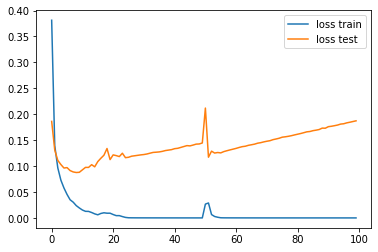

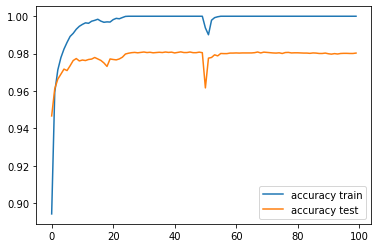

In [4]:
# results
train_results = mlp_adam.evaluate(X_train, y_train)
test_results = mlp_adam.evaluate(X_test, y_test)

loss_train = history.history["loss"]
loss_test = history.history["val_loss"]

accuracy_train = history.history["accuracy"]
accuracy_test = history.history["val_accuracy"]

import matplotlib.pyplot as plt

plt.plot(loss_train, label="loss train")
plt.plot(loss_test, label="loss test")
plt.legend()
plt.show()

plt.plot(accuracy_train, label="accuracy train")
plt.plot(accuracy_test, label="accuracy test")
plt.legend()
plt.show()

In [5]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256

# create model
mlp_rmsprop_1 = keras.Sequential(name="MLP_RMSProp_1")
mlp_rmsprop_1.add(Input(shape=(num_features,)))
mlp_rmsprop_1.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu"))
mlp_rmsprop_1.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu"))
mlp_rmsprop_1.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax"))

mlp_rmsprop_1.summary()

Model: "MLP_RMSProp_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [6]:
# compile model
rho = 0.01
# rho = 0.99

mlp_rmsprop_1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = mlp_rmsprop_1.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 0.4309 - accuracy: 0.8787 - val_loss: 0.2164 - val_accuracy: 0.9366
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 0.1818 - accuracy: 0.9461 - val_loss: 0.1600 - val_accuracy: 0.9534
Epoch 3/100
219/219 [==============================] - 1s 5ms/step - loss: 0.1311 - accuracy: 0.9615 - val_loss: 0.1408 - val_accuracy: 0.9586
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1055 - accuracy: 0.9691 - val_loss: 0.1326 - val_accuracy: 0.9633
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0897 - accuracy: 0.9739 - val_loss: 0.1318 - val_accuracy: 0.9641
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0787 - accuracy: 0.9778 - val_loss: 0.1249 - val_accuracy: 0.9681
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0719 - accuracy: 0.9806 - val_loss: 0.1309 - val_accuracy: 0.9695

In [7]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256

# create model
mlp_rmsprop_2 = keras.Sequential(name="MLP_RMSProp_2")
mlp_rmsprop_2.add(Input(shape=(num_features,)))
mlp_rmsprop_2.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu"))
mlp_rmsprop_2.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu"))
mlp_rmsprop_2.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax"))

mlp_rmsprop_2.summary()

Model: "MLP_RMSProp_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile model
rho = 0.99

mlp_rmsprop_2.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=rho),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = mlp_rmsprop_2.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 0.2934 - accuracy: 0.9099 - val_loss: 0.1595 - val_accuracy: 0.9514
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1194 - accuracy: 0.9639 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0842 - accuracy: 0.9742 - val_loss: 0.0981 - val_accuracy: 0.9713
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9806 - val_loss: 0.0828 - val_accuracy: 0.9756
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9843 - val_loss: 0.0898 - val_accuracy: 0.9729
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0900 - val_accuracy: 0.9743
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0848 - val_accuracy: 0.9761

In [9]:
from tensorflow.keras import initializers

# network params
n_hidden_1 = 128
n_hidden_2 = 256

# create model
mlp_sgd_1 = keras.Sequential(name="MLP_SGD_1")
mlp_sgd_1.add(Input(shape=(num_features,)))
mlp_sgd_1.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10)))
mlp_sgd_1.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10)))
mlp_sgd_1.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax", kernel_initializer=initializers.RandomNormal(mean=10)))

mlp_sgd_1.summary()

Model: "MLP_SGD_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile model
mlp_sgd_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = mlp_sgd_1.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 2558688000.0000 - accuracy: 0.1105 - val_loss: 2.3021 - val_accuracy: 0.1144
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3019 - accuracy: 0.1121 - val_loss: 2.3017 - val_accuracy: 0.1144
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1121 - val_loss: 2.3015 - val_accuracy: 0.1144
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3015 - accuracy: 0.1121 - val_loss: 2.3014 - val_accuracy: 0.1144
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1144
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.1121 - val_loss: 2.3012 - val_accuracy: 0.1144
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.1121 - val_loss: 2.3012 - val_accurac

In [11]:
from tensorflow.keras import regularizers

# network params
n_hidden_1 = 128
n_hidden_2 = 256
a_reg = 0.1

# create model
mlp_sgd_2 = keras.Sequential(name="MLP_SGD_2")
mlp_sgd_2.add(Input(shape=(num_features,)))
mlp_sgd_2.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))
mlp_sgd_2.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))
mlp_sgd_2.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))

mlp_sgd_2.summary()

Model: "MLP_SGD_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile model
mlp_sgd_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = mlp_sgd_2.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 1792158859264.0000 - accuracy: 0.1119 - val_loss: 1130632183808.0000 - val_accuracy: 0.1144
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 754727714816.0000 - accuracy: 0.1121 - val_loss: 470433169408.0000 - val_accuracy: 0.1144
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 314027114496.0000 - accuracy: 0.1121 - val_loss: 195738042368.0000 - val_accuracy: 0.1144
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 130660474880.0000 - accuracy: 0.1121 - val_loss: 81442693120.0000 - val_accuracy: 0.1144
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 54365245440.0000 - accuracy: 0.1121 - val_loss: 33886701568.0000 - val_accuracy: 0.1144
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 22620305408.0000 - accuracy: 0.1121 - val_loss: 14099590144.0000 - val_accuracy: 0.1144
Epoch 7/100
2

In [13]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256
a_reg = 0.01

# create model
mlp_sgd_3 = keras.Sequential(name="MLP_SGD_3")
mlp_sgd_3.add(Input(shape=(num_features,)))
mlp_sgd_3.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))
mlp_sgd_3.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))
mlp_sgd_3.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))

mlp_sgd_3.summary()

Model: "MLP_SGD_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compile model
mlp_sgd_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = mlp_sgd_3.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 244848492544.0000 - accuracy: 0.1110 - val_loss: 233540976640.0000 - val_accuracy: 0.1144
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 223658983424.0000 - accuracy: 0.1121 - val_loss: 213951479808.0000 - val_accuracy: 0.1144
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 204898254848.0000 - accuracy: 0.1121 - val_loss: 196005068800.0000 - val_accuracy: 0.1144
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 187711307776.0000 - accuracy: 0.1121 - val_loss: 179563986944.0000 - val_accuracy: 0.1144
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 171965972480.0000 - accuracy: 0.1121 - val_loss: 164502142976.0000 - val_accuracy: 0.1144
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 157541285888.0000 - accuracy: 0.1121 - val_loss: 150703456256.0000 - val_accuracy: 0.1144
Epoch 7/10

In [15]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256
a_reg = 0.001

# create model
mlp_sgd_4 = keras.Sequential(name="MLP_SGD_4")
mlp_sgd_4.add(Input(shape=(num_features,)))
mlp_sgd_4.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))
mlp_sgd_4.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))
mlp_sgd_4.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l2(a_reg)))

mlp_sgd_4.summary()

Model: "MLP_SGD_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile model
mlp_sgd_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = mlp_sgd_4.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 39302426624.0000 - accuracy: 0.1112 - val_loss: 35920809984.0000 - val_accuracy: 0.1144
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 35764826112.0000 - accuracy: 0.1121 - val_loss: 35607515136.0000 - val_accuracy: 0.1144
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 35452899328.0000 - accuracy: 0.1121 - val_loss: 35296915456.0000 - val_accuracy: 0.1144
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 35143671808.0000 - accuracy: 0.1121 - val_loss: 34989051904.0000 - val_accuracy: 0.1144
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 34837159936.0000 - accuracy: 0.1121 - val_loss: 34683887616.0000 - val_accuracy: 0.1144
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 34533314560.0000 - accuracy: 0.1121 - val_loss: 34381377536.0000 - val_accuracy: 0.1144
Epoch 7/100
219/219 [=

In [17]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256
a_reg = 0.01
dropout_prob = 0.3
# create model
mlp_sgd_5 = keras.Sequential(name="MLP_SGD_5")
mlp_sgd_5.add(Input(shape=(num_features,)))
mlp_sgd_5.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l1(a_reg)))
mlp_sgd_5.add(tf.keras.layers.Dropout(dropout_prob))
mlp_sgd_5.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l1(a_reg)))
mlp_sgd_5.add(tf.keras.layers.Dropout(dropout_prob))
mlp_sgd_5.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax", kernel_initializer=initializers.RandomNormal(mean=10), kernel_regularizer=regularizers.l1(a_reg)))
mlp_sgd_5.add(tf.keras.layers.Dropout(dropout_prob))

mlp_sgd_5.summary()

Model: "MLP_SGD_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-train